In [2]:
# datayi birlestiririk rahat isleye bilmek ucun + label column u elave edirik Truelar 1, Fakeler 0 olaraq

import pandas as pd 

true_df = pd.read_csv(r"C:\Users\mmmdu\OneDrive\Documents\github\projects\Fake-News-Detection-NLP\data\raw\True.csv")
fake_df = pd.read_csv(r'C:\Users\mmmdu\OneDrive\Documents\github\projects\Fake-News-Detection-NLP\data\raw\Fake.csv')

true_df['label'] = 1
fake_df['label'] = 0

df = pd.concat([true_df, fake_df], ignore_index= True)

df = df.sample(frac=1, random_state = 42).reset_index(drop = True)

df.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [3]:
print(df.shape)
print(df['label'].value_counts())
print(df.isnull().sum())

(44898, 5)
label
0    23481
1    21417
Name: count, dtype: int64
title      0
text       0
subject    0
date       0
label      0
dtype: int64


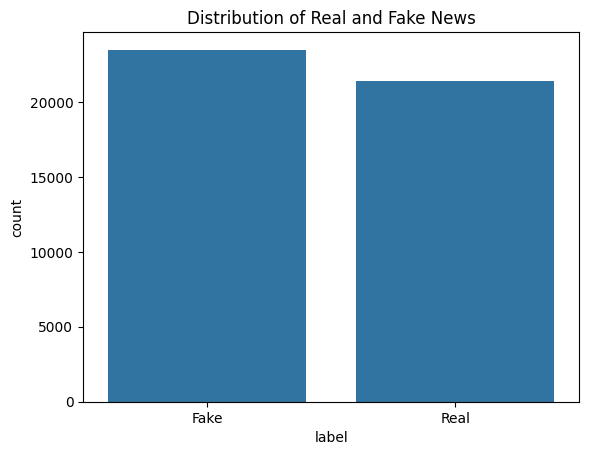

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x= 'label')
plt.title('Distribution of Real and Fake News')
plt.xticks(ticks = [0,1], labels = ['Fake', 'Real'])
plt.show()

In [5]:
df_eda = df.copy()

df_eda['text_len'] = df_eda['text'].apply(len)
df_eda['word_count'] = df_eda['text'].apply(lambda x: len(x.split()))
df_eda['title_word_count'] = df_eda['title'].apply(lambda x: len(x.split()))

df_eda[['text_len','word_count','title_word_count']].head()

,text_len,word_count,title_word_count
0,2114,361,11
1,2823,495,9
2,2402,379,14
3,629,88,9
4,793,138,19


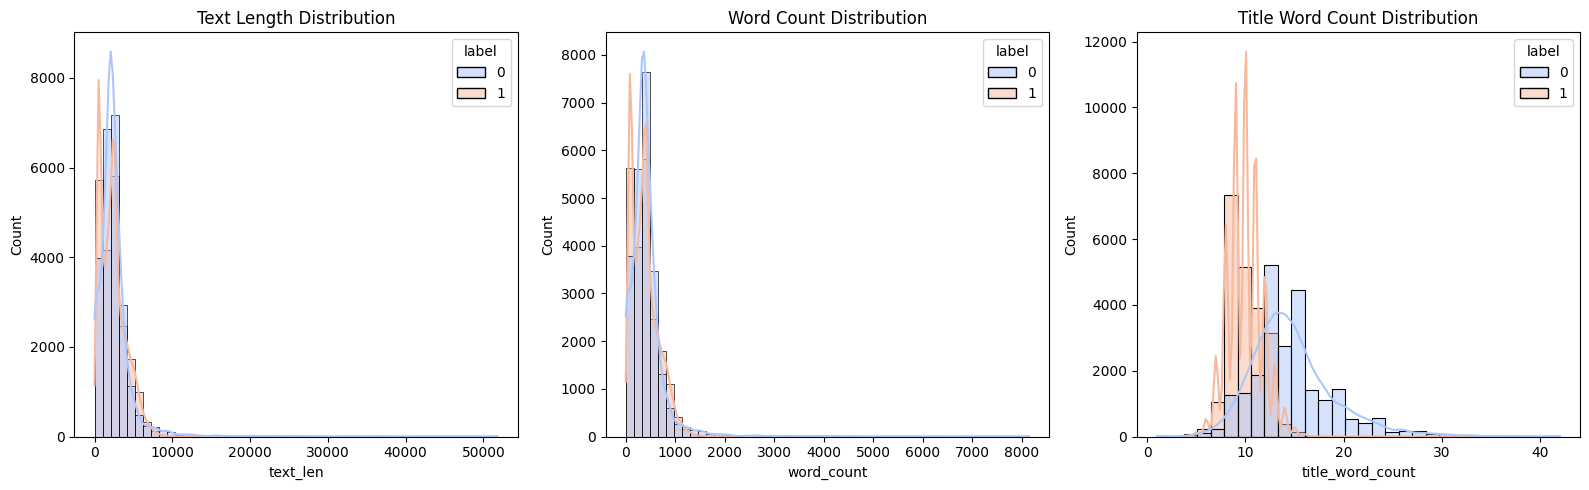

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize =(16,5))

plt.subplot(1,3,1)
sns.histplot(data = df_eda, x= 'text_len', hue = 'label', bins = 50, kde= True, palette = 'coolwarm')
plt.title('Text Length Distribution')

plt.subplot(1,3,2)
sns.histplot(data = df_eda, x = 'word_count', hue = 'label', bins = 50, kde = True, palette = 'coolwarm')
plt.title('Word Count Distribution')

plt.subplot(1,3,3)
sns.histplot(data = df_eda, x = 'title_word_count', hue = 'label', bins = 30, kde = True, palette = 'coolwarm')
plt.title('Title Word Count Distribution')

plt.tight_layout()
plt.show()

In [16]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'https?\S+|www\.\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mmmdu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mmmdu\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mmmdu\AppData\Roaming\nltk_data...


In [15]:
pip install nltk

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.1 MB/s eta 0:00:00
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
df_eda['clean_text'] = df_eda['text'].apply(clean_text)

In [20]:
df_eda.head()

,title,text,subject,date,label,text_len,word_count,title_word_count,clean_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,2114,361,11,donald trump white house chaos trying cover ru...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,2823,495,9,donald trump presumptive gop nominee time reme...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,2402,379,14,mike penny huge homophobe support exgay conver...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,629,88,9,san francisco reuters california attorney gene...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,793,138,19,twisted reasoning come pelosi day especially p...


In [21]:
df_eda.shape

(44898, 9)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)

X_tfidf = tfidf_vectorizer.fit_transform(df_eda['clean_text'])

y = df_eda['label']

In [24]:
print(X_tfidf.shape)
print(X_tfidf[0].toarray())
print(tfidf_vectorizer.get_feature_names_out()[:10])

(44898, 5000)
[[0. 0. 0. ... 0. 0. 0.]]
['abandon' 'abandoned' 'abbas' 'abc' 'abdullah' 'abe' 'abedin' 'ability'
 'able' 'aboard']
